# Data Classification

## Importing the required libraries

In [1]:
import matplotlib.pyplot as plt, numpy as np, scipy.stats, scipy.signal, pandas as pd

from numpy import genfromtxt
from sklearn import svm
from sklearn.model_selection import train_test_split

## Loading and visualising the sample data

In [150]:
dataset_sample = genfromtxt('new_datasets/test_ceramic.csv', delimiter=',')

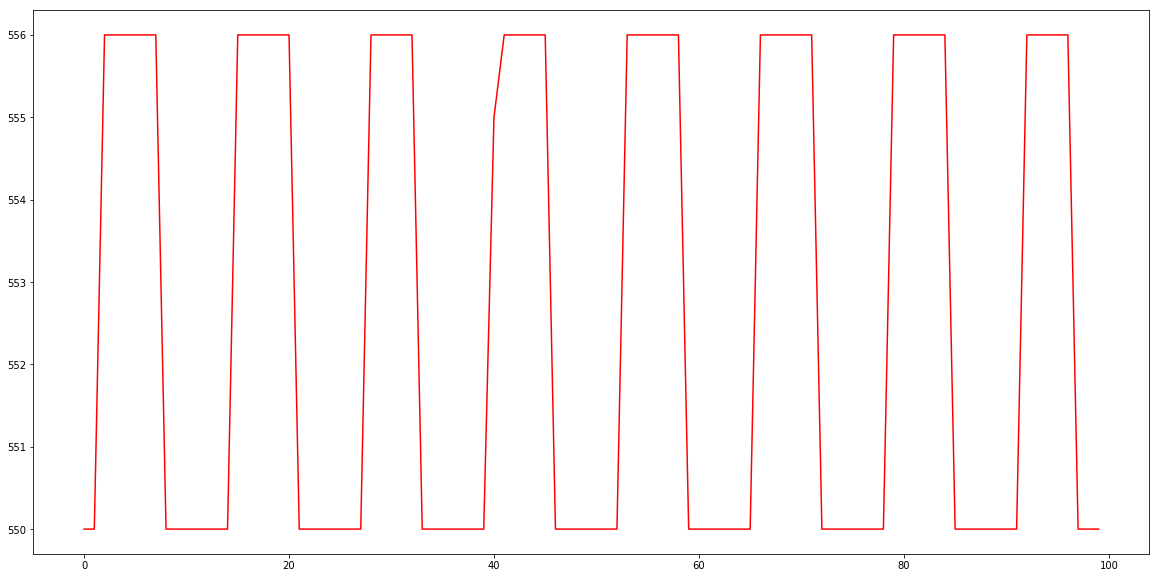

In [151]:
plt.figure(figsize=(20,10))

for i in range(3,4):
    plt.plot(dataset_sample[i],'r', linewidth=1.5)
plt.show()

## Loading the datasets

Each of the dataset contain a total of 10,000 points in the form of 100x100 format. All the different datapoints have been collected with the apparatus being kept at a distance of 8cm from the object.

In [2]:
dataset_ceramic = genfromtxt('new_datasets/ceramic.csv', delimiter=',')
dataset_wood = genfromtxt('new_datasets/ceramic_2.csv', delimiter=',')
#dataset_cardboard = genfromtxt('new_datasets/cardboard.csv', delimiter=',')

## Plotting the pulse values

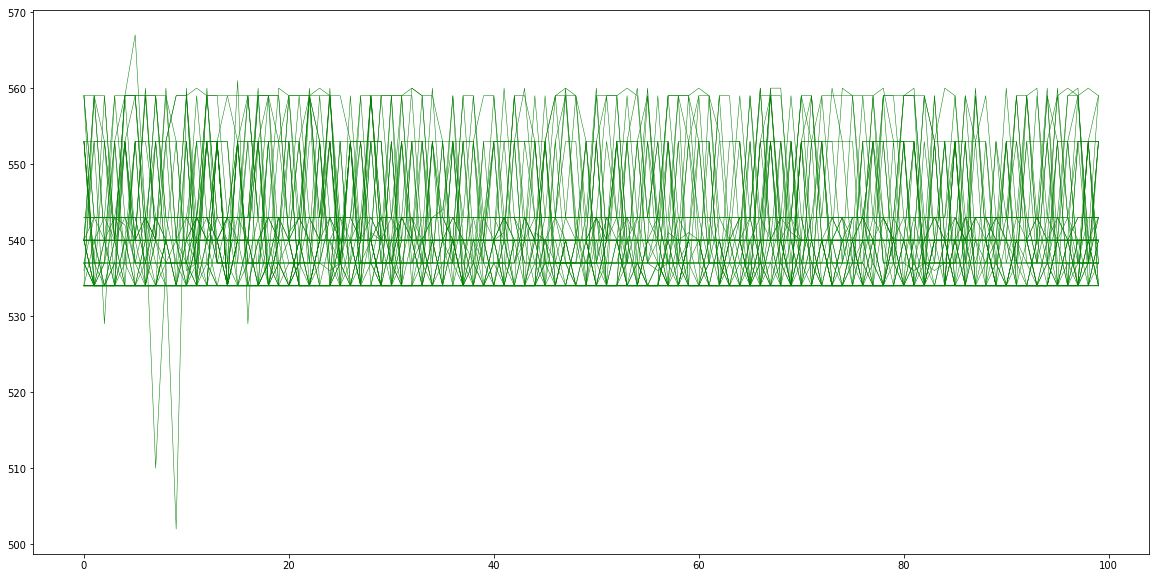

In [4]:
plt.figure(figsize=(20,10))

for i in range(0, 50):
    #plt.plot(dataset_ceramic[i],'r', linewidth=0.5)
    plt.plot(dataset_wood[i],'g', linewidth=0.5)
    #plt.plot(dataset_cardboard[i],'b', linewidth=0.5)
plt.show()

## Initialise a class ListTable

In [181]:
class ListTable(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)
    
analysis_condition = ListTable()

analysis_condition.append(['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'])

In [182]:
#temp_data = [dataset_ceramic, dataset_wood][1]
temp_data = [new_list, new_list1,new_list_test][2]
for i in range(0,50):
    print(np.amin(temp_data[i]),np.amax(temp_data[i]),np.ptp(temp_data[i]),
      np.percentile(temp_data[i],75),np.percentile(temp_data[i],25),
          np.median(temp_data[i]),np.mean(temp_data[i]),np.std(temp_data[i]),
          np.var(temp_data[i]),scipy.stats.kurtosis(temp_data[i]),
          scipy.stats.skew(temp_data[i]))

550.0 556.0 6.0 550.0 550.0 550.0 550.18 1.0235233265539188 1.0475999999999996 28.36426116838595 5.510377588549313
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.941558441558437 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.82 2.9945951312322667 8.967599999999997 -1.9855479727017338 0.12021658495507903
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762777
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.7 2.9849623113198596 8.909999999999998 -1.9595959595959713 0.2010075630517967
550.0 556.0 6.0 556.0 550.0 550.0 552.82 2.9945951312322667 8.967599999999997 -1.98554797270173

In [183]:
for i in range(0,50):
    analysis_condition.append([np.amin(temp_data[i]),np.amax(temp_data[i]),np.ptp(temp_data[i]),
      np.percentile(temp_data[i],75),np.percentile(temp_data[i],25),
          np.median(temp_data[i]),np.mean(temp_data[i]),round(np.std(temp_data[i]),2),
          round(np.var(temp_data[i]),2),round(scipy.stats.kurtosis(temp_data[i]),2),
          round(scipy.stats.skew(temp_data[i]),2)])
    
analysis_condition

Min,Max,Range,75%,25%,Median,Mean,STD,Var,Kurtosis,skewness
550.0,556.0,6.0,550.0,550.0,550.0,550.18,1.02,1.05,28.36,5.51
550.0,556.0,6.0,556.0,550.0,550.0,552.64,2.98,8.87,-1.94,0.24
550.0,556.0,6.0,556.0,550.0,550.0,552.76,2.99,8.94,-1.97,0.16
550.0,556.0,6.0,556.0,550.0,550.0,552.76,2.99,8.94,-1.97,0.16
550.0,556.0,6.0,556.0,550.0,550.0,552.82,2.99,8.97,-1.99,0.12
550.0,556.0,6.0,556.0,550.0,550.0,552.64,2.98,8.87,-1.94,0.24
550.0,556.0,6.0,556.0,550.0,550.0,552.64,2.98,8.87,-1.94,0.24
550.0,556.0,6.0,556.0,550.0,550.0,552.7,2.98,8.91,-1.96,0.2
550.0,556.0,6.0,556.0,550.0,550.0,552.82,2.99,8.97,-1.99,0.12
550.0,556.0,6.0,556.0,550.0,550.0,552.76,2.99,8.94,-1.97,0.16


## Plotting the statistics associated with a single pulse value

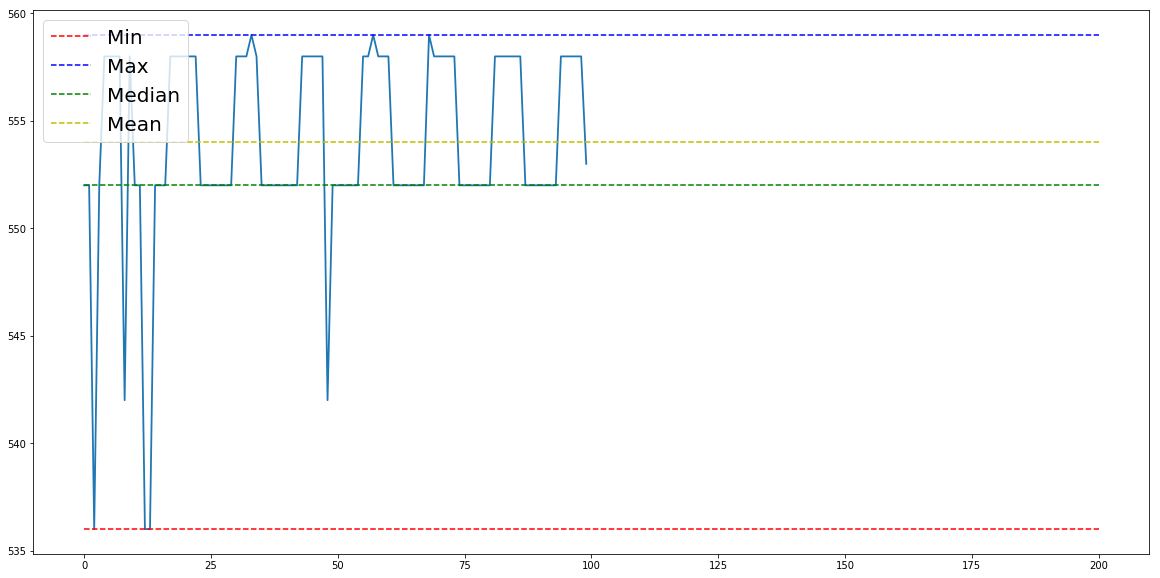

In [184]:
single_plot_value = dataset_ceramic[10]

plot_analysis = [np.amin(single_plot_value), np.amax(single_plot_value),
                 np.ptp(single_plot_value), np.percentile(single_plot_value, 75),
                 np.percentile(single_plot_value, 25), np.median(single_plot_value),
                 np.mean(single_plot_value), round(np.std(single_plot_value),2),
                 round(np.var(single_plot_value),2), round(scipy.stats.kurtosis(single_plot_value),2),
                 round(scipy.stats.skew(single_plot_value),2)]

plt.figure(figsize=(20,10))
datapoints = np.linspace(0,200)

plt.plot(single_plot_value, linewidth=1.8)

plt.plot(datapoints, np.array([plot_analysis[0] for i in range(len(datapoints))]), 'r--', label = 'Min')
plt.plot(datapoints, np.array([plot_analysis[1] for i in range(len(datapoints))]), 'b--', label = 'Max')

plt.plot(datapoints, np.array([plot_analysis[5] for i in range(len(datapoints))]), 'g--', label = 'Median')
plt.plot(datapoints, np.array([plot_analysis[6] for i in range(len(datapoints))]), 'y--', label = 'Mean')

plt.legend(loc = 2, prop={'size': 20})

## Getting ready with dataset

In [185]:
x_train = analysis_condition[1:]
df = pd.DataFrame(x_train)
#df = df.drop([2,7,8,9,10], axis=1)

### Correlation of dataframe

In [186]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.821470,0.744503,0.802386,1.000000,0.913660,0.931133,0.726331,0.685974,-0.019042,-0.266793
1,0.821470,1.000000,0.992298,0.977454,0.821470,0.901616,0.957641,0.982788,0.973312,-0.030472,-0.213740
2,0.744503,0.992298,1.000000,0.970048,0.744503,0.857089,0.918885,0.992814,0.990486,-0.031538,-0.192280
3,0.802386,0.977454,0.970048,1.000000,0.802386,0.880488,0.957575,0.981884,0.957278,-0.171652,-0.377794
4,1.000000,0.821470,0.744503,0.802386,1.000000,0.913660,0.931133,0.726331,0.685974,-0.019042,-0.266793
5,0.913660,0.901616,0.857089,0.880488,0.913660,1.000000,0.965372,0.851051,0.849732,-0.026326,-0.257889
6,0.931133,0.957641,0.918885,0.957575,0.931133,0.965372,1.000000,0.918662,0.892708,-0.113465,-0.346465
7,0.726331,0.982788,0.992814,0.981884,0.726331,0.851051,0.918662,1.000000,0.991412,-0.139277,-0.297622
8,0.685974,0.973312,0.990486,0.957278,0.685974,0.849732,0.892708,0.991412,1.000000,-0.059734,-0.209402
9,-0.019042,-0.030472,-0.031538,-0.171652,-0.019042,-0.026326,-0.113465,-0.139277,-0.059734,1.000000,0.934432


### Making a dataframe

In [187]:
x_train_array = df.as_matrix()
len(x_train_array)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


50

### Labelling the data

In [188]:
y_train_array = []

# for i in range(0,50):
#     y_train_array.append('Ceramic')
# for i in range(50,100):   
#     y_train_array.append('Wood')
for i in range(0,50):   
    y_train_array.append('Ceramic')
    
x_train_array = np.array(x_train_array)
print(x_train_array.shape)

x_train_array = x_train_array.reshape(x_train_array.shape[0],11)
print(x_train_array.shape)

(50, 11)
(50, 11)


## Testing out the Machine Learning algorithm

### Test-train split

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x_train_array, y_train_array, test_size=0.33)
clf = svm.SVC(probability=True)

### Initialising Machine Learning algorithm

In [175]:
clf = svm.SVC(probability=True)
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Confidence values of each class

In [190]:
clf.predict_proba(x_train_array)

array([[0.63581295, 0.36418705],
       [0.51380271, 0.48619729],
       [0.51059166, 0.48940834],
       [0.51059166, 0.48940834],
       [0.50914328, 0.49085672],
       [0.51380271, 0.48619729],
       [0.51380271, 0.48619729],
       [0.51220207, 0.48779793],
       [0.50914328, 0.49085672],
       [0.51059166, 0.48940834],
       [0.51220207, 0.48779793],
       [0.51380271, 0.48619729],
       [0.51380271, 0.48619729],
       [0.50914328, 0.49085672],
       [0.51059166, 0.48940834],
       [0.51059166, 0.48940834],
       [0.51380271, 0.48619729],
       [0.51380271, 0.48619729],
       [0.51059166, 0.48940834],
       [0.51059166, 0.48940834],
       [0.63572098, 0.36427902],
       [0.51380271, 0.48619729],
       [0.51380271, 0.48619729],
       [0.51220207, 0.48779793],
       [0.50914328, 0.49085672],
       [0.51059166, 0.48940834],
       [0.51220207, 0.48779793],
       [0.51380271, 0.48619729],
       [0.50607703, 0.49392297],
       [0.63579668, 0.36420332],
       [0.

### Prediction of the test datapoints

In [191]:
clf.predict(x_train_array)

array(['Ceramic', 'Wood', 'Wood', 'Wood', 'Wood', 'Wood', 'Wood', 'Wood',
       'Wood', 'Wood', 'Wood', 'Wood', 'Wood', 'Wood', 'Wood', 'Wood',
       'Wood', 'Wood', 'Wood', 'Wood', 'Ceramic', 'Wood', 'Wood', 'Wood',
       'Wood', 'Wood', 'Wood', 'Wood', 'Wood', 'Ceramic', 'Ceramic',
       'Ceramic', 'Ceramic', 'Ceramic', 'Wood', 'Wood', 'Wood', 'Wood',
       'Wood', 'Wood', 'Wood', 'Wood', 'Wood', 'Wood', 'Wood', 'Wood',
       'Wood', 'Wood', 'Wood', 'Wood'], dtype='<U7')

### Score of the classifier

In [192]:
clf.score(x_train_array, y_train_array) * 100

14.000000000000002

## Working with the filtered dataset

### Loading the filtered dataset

In [56]:
for i in range(0, 50):
    new_list1 = [np.percentile(dataset_ceramic[i], 75) if val > np.mean(dataset_ceramic[i]) else np.percentile(dataset_ceramic[i], 25) for val in dataset_ceramic[i]]
print(new_list1)

[558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0]


### Plotting the filtered dataset

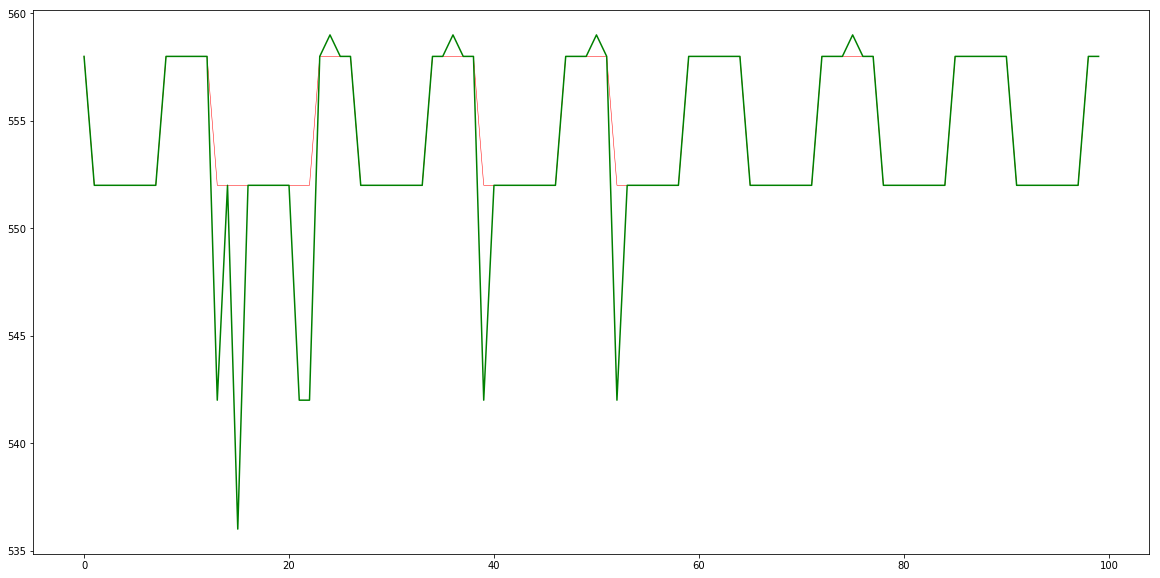

In [57]:
plt.figure(figsize=(20,10))

plt.plot(new_list1,'r', linewidth=0.5)
plt.plot(dataset_ceramic[49],'g', linewidth=1.5)
plt.show()

In [110]:
new_list = []
new_list1 = []
for i in range(0, 50):
    new_list.append([np.percentile(dataset_wood[i], 75) if val > np.mean(dataset_wood[i]) else np.percentile(dataset_wood[i], 25) for val in dataset_wood[i]])
    new_list1.append([np.percentile(dataset_ceramic[i], 75) if val > np.mean(dataset_ceramic[i]) else np.percentile(dataset_ceramic[i], 25) for val in dataset_ceramic[i]])

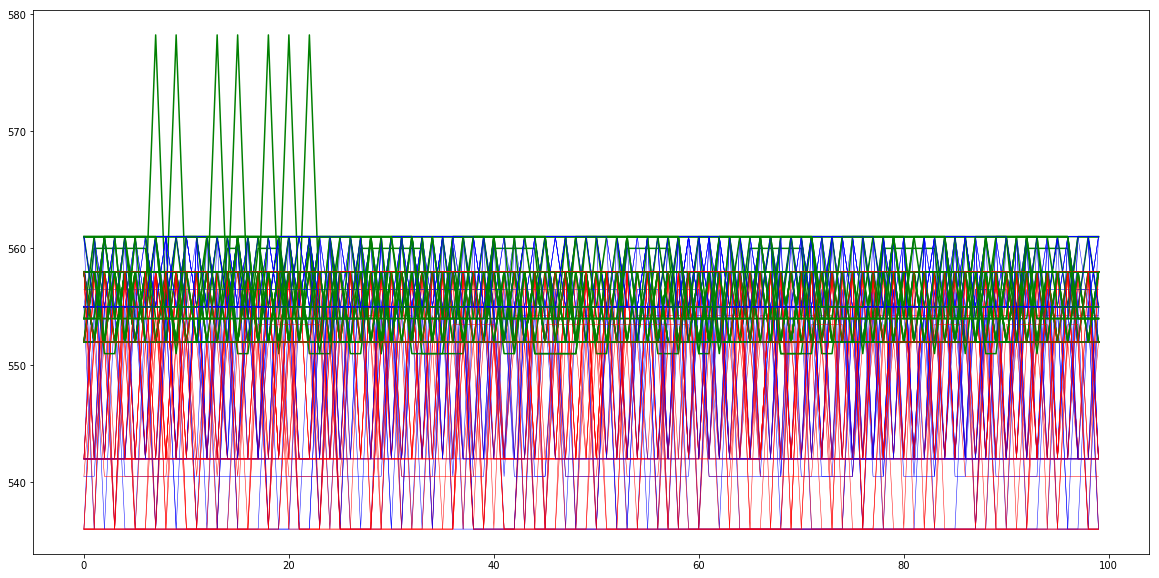

In [149]:
plt.figure(figsize=(20,10))
for i in range(0,50):
    plt.plot(new_list[i],'b', linewidth=0.5)
    plt.plot(new_list1[i],'r', linewidth=0.5)
    plt.plot(new_list_test[i],'g', linewidth=1.5)
plt.show()

### Plotting the datapoints of a single pulse

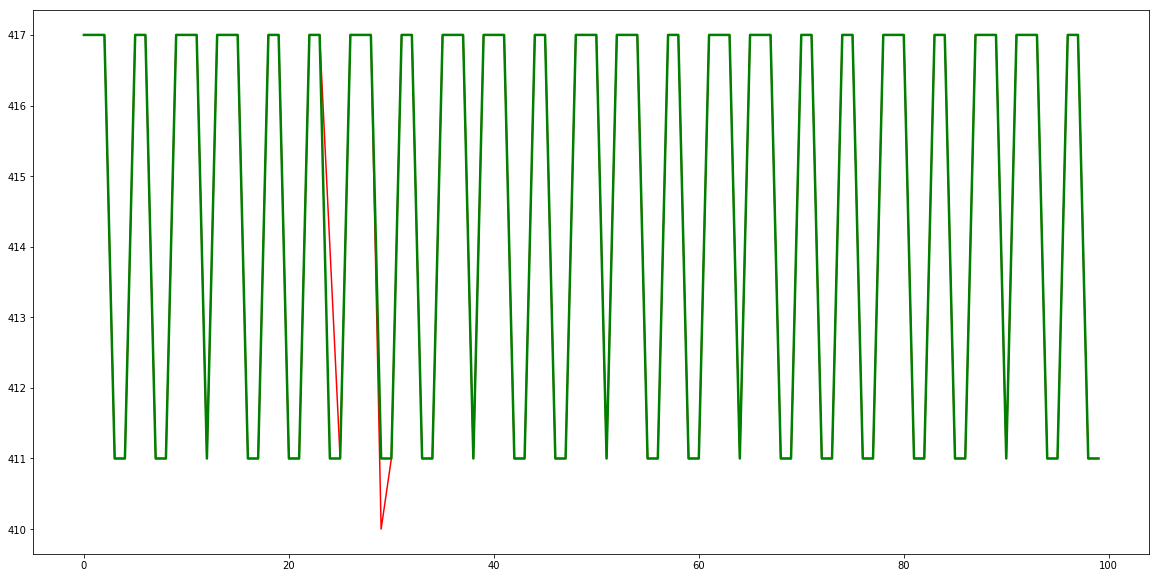

In [38]:
plt.figure(figsize=(20,10))

for i in range(0,1):
    plt.plot(dataset_ceramic_8cm[i],'r', linewidth=1.5)
    plt.plot(filter_dataset_ceramic_8cm[i],'g', linewidth=2.5)
plt.show()

In [152]:
new_list_test = []
y_test = []
for i in range(0, 50):
    new_list_test.append([np.percentile(dataset_sample[i], 75) if val > np.mean(dataset_sample[i]) else np.percentile(dataset_sample[i], 25) for val in dataset_sample[i]])
    y_test.append('Ceramic')

In [134]:
clf.predict(new_list_test)

ValueError: X.shape[1] = 100 should be equal to 6, the number of features at training time